In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import plotly.io as py
import gdown

In [2]:
# URL of the data
url = 'https://drive.google.com/uc?id=1A3FWCcQ6Oq0blFOzeupyqygUrFyali-J'
output = '../data/Chronic_Disease_Indicators.csv'
gdown.download(url, output, quiet=False)

# Now you can work with the DataFrame 'df'
df = pd.read_csv(output, low_memory=False)

Downloading...
From (original): https://drive.google.com/uc?id=1A3FWCcQ6Oq0blFOzeupyqygUrFyali-J
From (redirected): https://drive.google.com/uc?id=1A3FWCcQ6Oq0blFOzeupyqygUrFyali-J&confirm=t&uuid=b80da276-f550-4709-9ceb-d69be39ec03f
To: /Users/ttarif/Desktop/241/Final/data/Chronic_Disease_Indicators.csv
100%|████████████████████████████████████████| 359M/359M [00:11<00:00, 30.1MB/s]


# EDA

In [35]:
# Return info of dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 794819 entries, 0 to 1185675
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  794819 non-null  int64  
 1   YearEnd                    794819 non-null  int64  
 2   LocationAbbr               794819 non-null  object 
 3   LocationDesc               794819 non-null  object 
 4   DataSource                 794819 non-null  object 
 5   Topic                      794819 non-null  object 
 6   Question                   794819 non-null  object 
 7   DataValueUnit              691045 non-null  object 
 8   DataValueType              794819 non-null  object 
 9   DataValue                  794819 non-null  float64
 10  DataValueAlt               794819 non-null  float64
 11  DataValueFootnoteSymbol    10723 non-null   object 
 12  DatavalueFootnote          10723 non-null   object 
 13  LowConfidenceLimit         674338

In [34]:
print(df.head(3))

   YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   

                      Question DataValueUnit DataValueType  DataValue  ...  \
0  Hospitalizations for asthma           NaN        Number      916.0  ...   
1  Hospitalizations for asthma           NaN        Number     2227.0  ...   
2  Hospitalizations for asthma           NaN        Number      708.0  ...   

   StratificationCategory1 Stratification1  \
0                   Gender            Male   
1                  Overall         Overall   
2                  Overall         Overall   

                                      GeoLocation  LocationID  TopicID  \
0    POINT (-92.27449074299966 34.74865012400045)           5      AST   
1  POINT (-106.13361092099967 38.8438

In [4]:
# Check for missing values
print(df.isnull().sum())

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Question                           0
Response                     1185676
DataValueUnit                 152123
DataValueType                      0
DataValue                     378734
DataValueAlt                  381098
DataValueFootnoteSymbol       791966
DatavalueFootnote             791966
LowConfidenceLimit            503296
HighConfidenceLimit           503296
StratificationCategory1            0
Stratification1                    0
StratificationCategory2      1185676
Stratification2              1185676
StratificationCategory3      1185676
Stratification3              1185676
GeoLocation                    10166
ResponseID                   1185676
LocationID                         0
TopicID                            0
QuestionID                         0
D

In [5]:
# Convert 'DataValue' column to numeric, coerce errors to NaN
print(df['DataValue'].dtype)
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')
#df.loc[:, 'DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')
print(df['DataValue'].dtype)
# Remove rows with NaN values in 'DataValue' column
df = df.dropna(subset=['DataValue'])

object
float64


In [6]:
# Print unique value counts per column
unique_counts = df.nunique()
print(unique_counts)

YearStart                       16
YearEnd                         15
LocationAbbr                    55
LocationDesc                    55
DataSource                      28
Topic                           17
Question                       193
Response                         0
DataValueUnit                   12
DataValueType                   16
DataValue                    41213
DataValueAlt                 41213
DataValueFootnoteSymbol          9
DatavalueFootnote               10
LowConfidenceLimit           22464
HighConfidenceLimit          24000
StratificationCategory1          3
Stratification1                 11
StratificationCategory2          0
Stratification2                  0
StratificationCategory3          0
Stratification3                  0
GeoLocation                     54
ResponseID                       0
LocationID                      55
TopicID                         17
QuestionID                     193
DataValueTypeID                 16
StratificationCatego

In [7]:
# Remove columns with no unique values
drop_columns = unique_counts[unique_counts <= 1].index
df.drop(columns=drop_columns, inplace=True)

# Display the first few rows of the dataset
print(df.head(5))

   YearStart  YearEnd LocationAbbr          LocationDesc DataSource   Topic  \
0       2014     2014           AR              Arkansas  SEDD; SID  Asthma   
1       2018     2018           CO              Colorado  SEDD; SID  Asthma   
2       2018     2018           DC  District of Columbia  SEDD; SID  Asthma   
3       2017     2017           GA               Georgia  SEDD; SID  Asthma   
4       2010     2010           MI              Michigan  SEDD; SID  Asthma   

                      Question DataValueUnit DataValueType  DataValue  ...  \
0  Hospitalizations for asthma           NaN        Number      916.0  ...   
1  Hospitalizations for asthma           NaN        Number     2227.0  ...   
2  Hospitalizations for asthma           NaN        Number      708.0  ...   
3  Hospitalizations for asthma           NaN        Number     3520.0  ...   
4  Hospitalizations for asthma           NaN        Number      123.0  ...   

   HighConfidenceLimit StratificationCategory1 Stratific

In [8]:
# Display the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (804578, 24)


In [9]:
# Explore unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nUnique values in '{column}':")
    print(df[column].value_counts())


Unique values in 'LocationAbbr':
LocationAbbr
AZ    18125
FL    18116
NY    18078
NC    18027
MI    17990
WA    17814
MD    17744
CA    17438
TX    17290
NJ    17167
CO    16994
MN    16977
OK    16846
NM    16684
WI    16682
GA    16512
SC    16412
HI    16322
NV    16231
VA    16212
OR    15891
OH    15878
KY    15873
PA    15772
NE    15748
CT    15549
MA    15545
AR    15508
MO    15303
IN    15272
IA    15002
LA    14962
KS    14870
RI    14740
AL    14675
UT    14597
TN    14550
MS    13987
DE    13823
AK    13808
IL    13808
DC    13527
SD    13283
MT    13040
WV    12881
ME    12092
ID    12020
ND    11866
WY    11773
VT    11713
NH    11218
US     9759
GU     6041
PR     5811
VI      732
Name: count, dtype: int64

Unique values in 'LocationDesc':
LocationDesc
Arizona                 18125
Florida                 18116
New York                18078
North Carolina          18027
Michigan                17990
Washington              17814
Maryland                17744
California

In [10]:
df = df[df['LocationAbbr'] != 'US']

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 794819 entries, 0 to 1185675
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  794819 non-null  int64  
 1   YearEnd                    794819 non-null  int64  
 2   LocationAbbr               794819 non-null  object 
 3   LocationDesc               794819 non-null  object 
 4   DataSource                 794819 non-null  object 
 5   Topic                      794819 non-null  object 
 6   Question                   794819 non-null  object 
 7   DataValueUnit              691045 non-null  object 
 8   DataValueType              794819 non-null  object 
 9   DataValue                  794819 non-null  float64
 10  DataValueAlt               794819 non-null  float64
 11  DataValueFootnoteSymbol    10723 non-null   object 
 12  DatavalueFootnote          10723 non-null   object 
 13  LowConfidenceLimit         674338

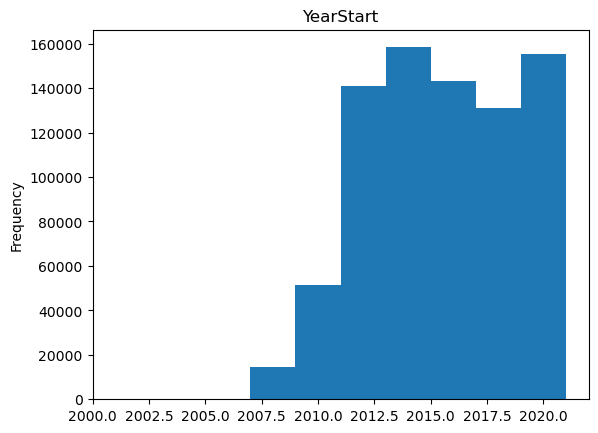

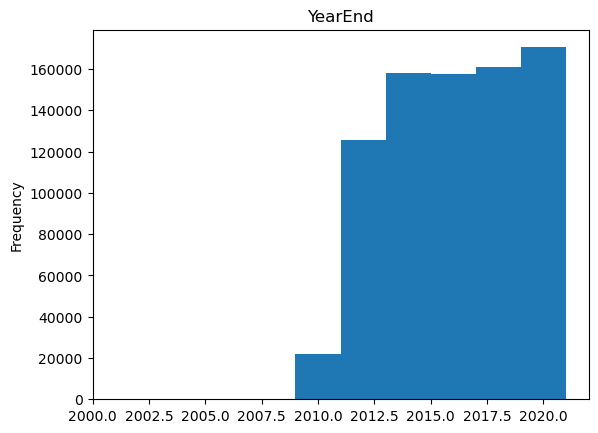

LocationAbbr has too many unique values to display a bar chart.
LocationDesc has too many unique values to display a bar chart.


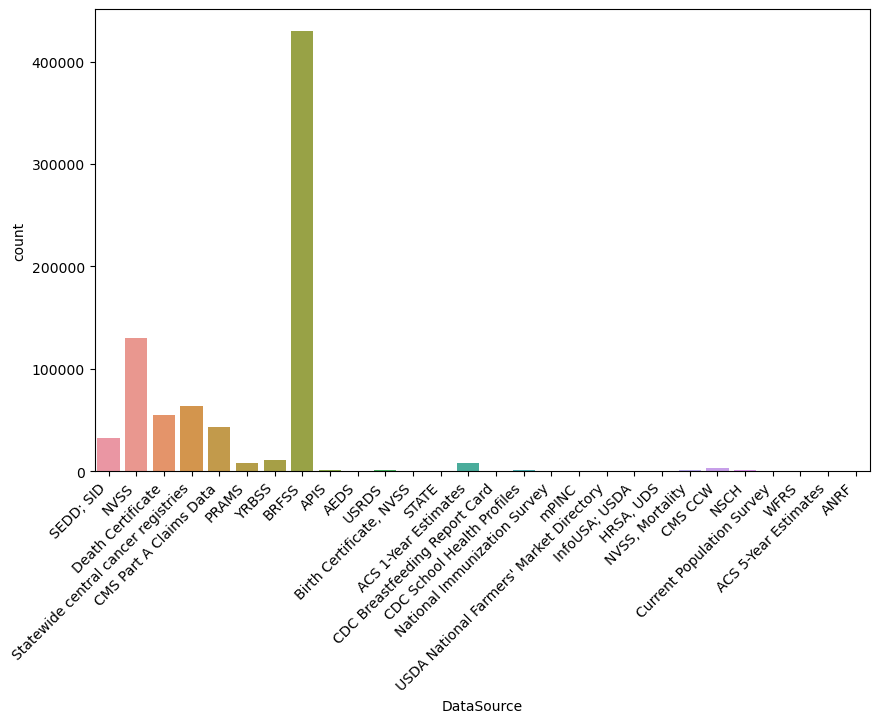

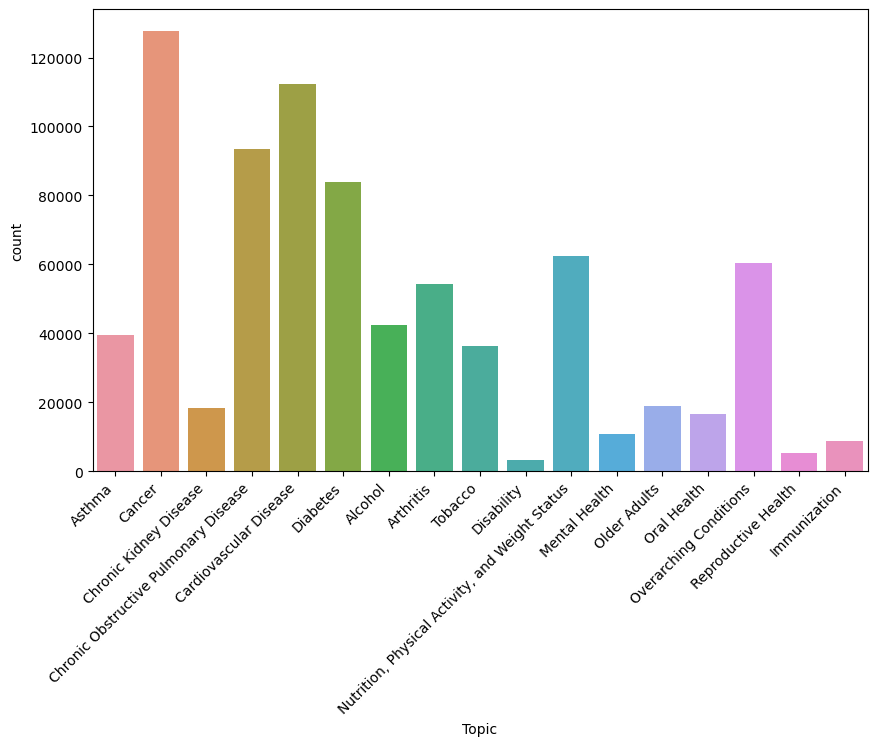

Question has too many unique values to display a bar chart.


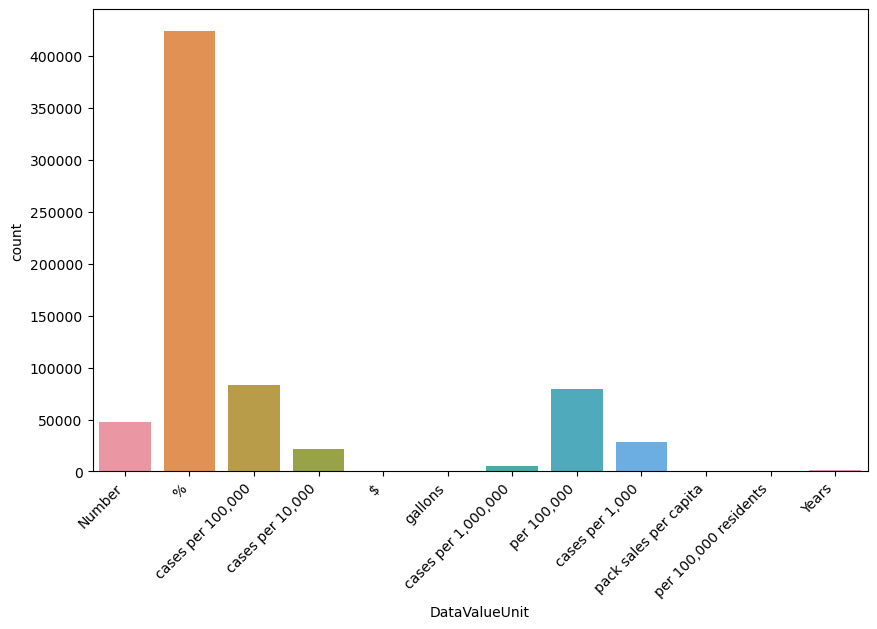

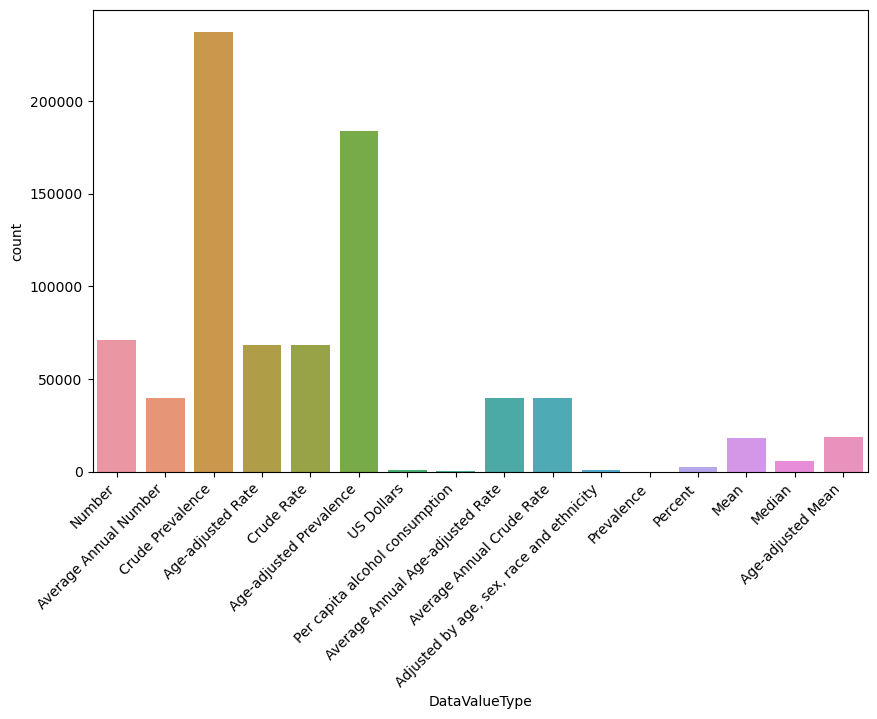

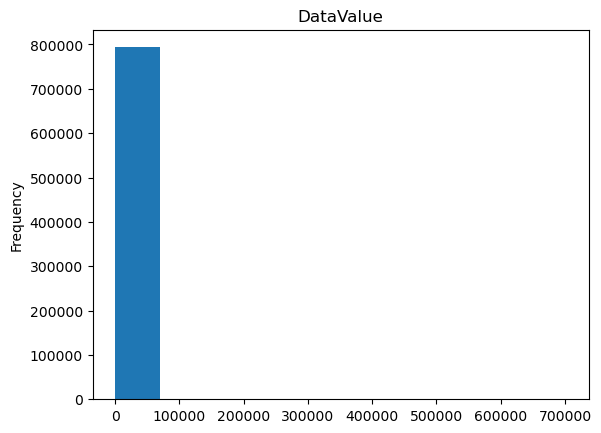

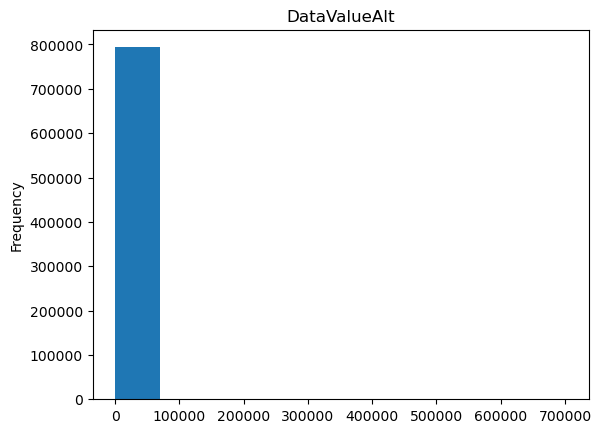

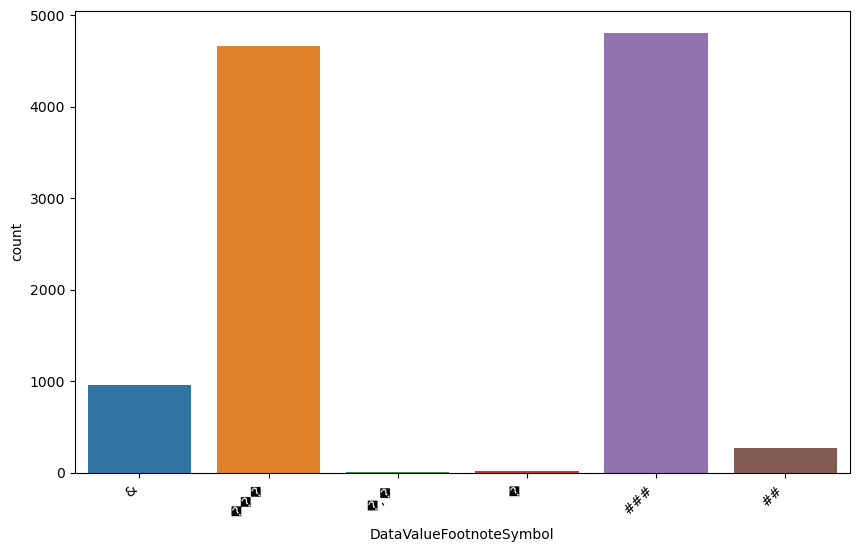

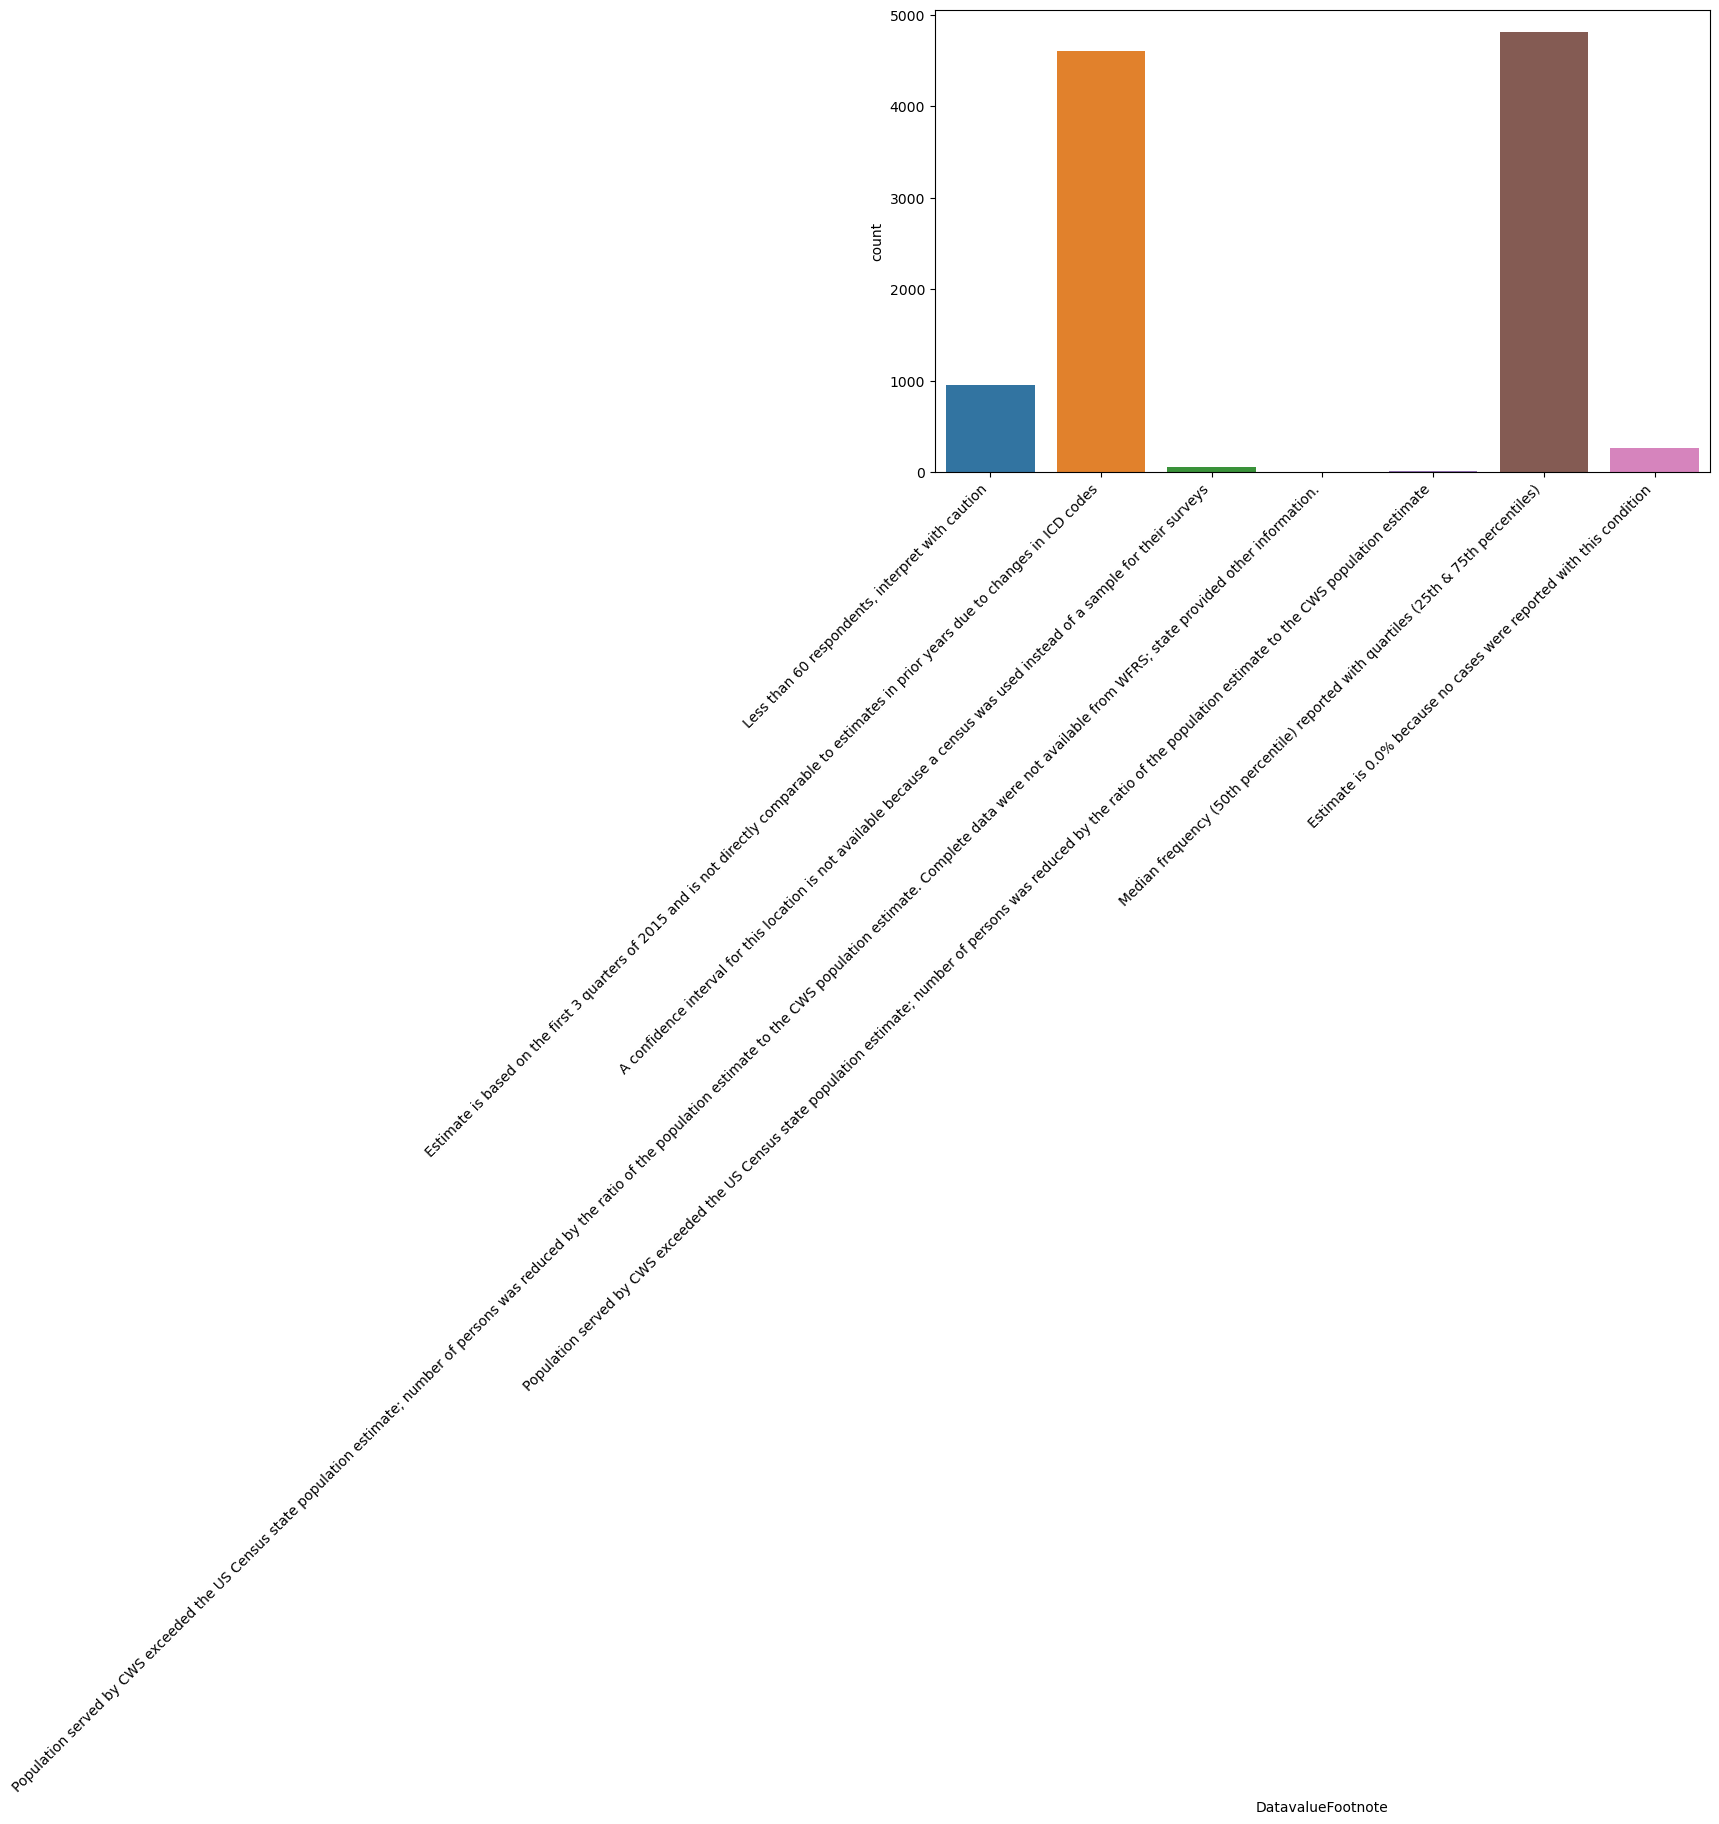

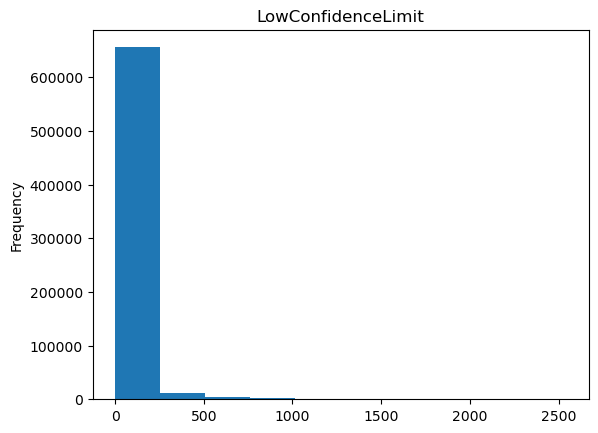

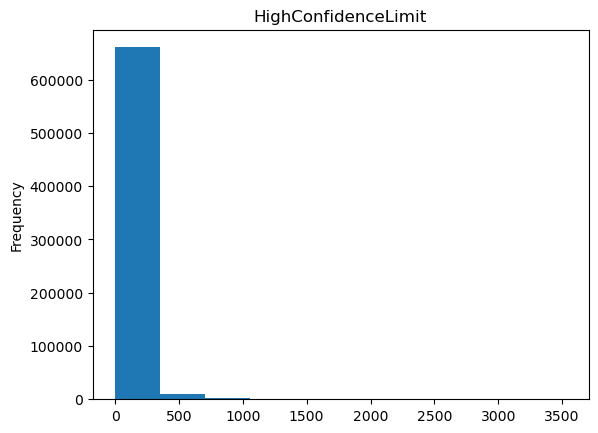

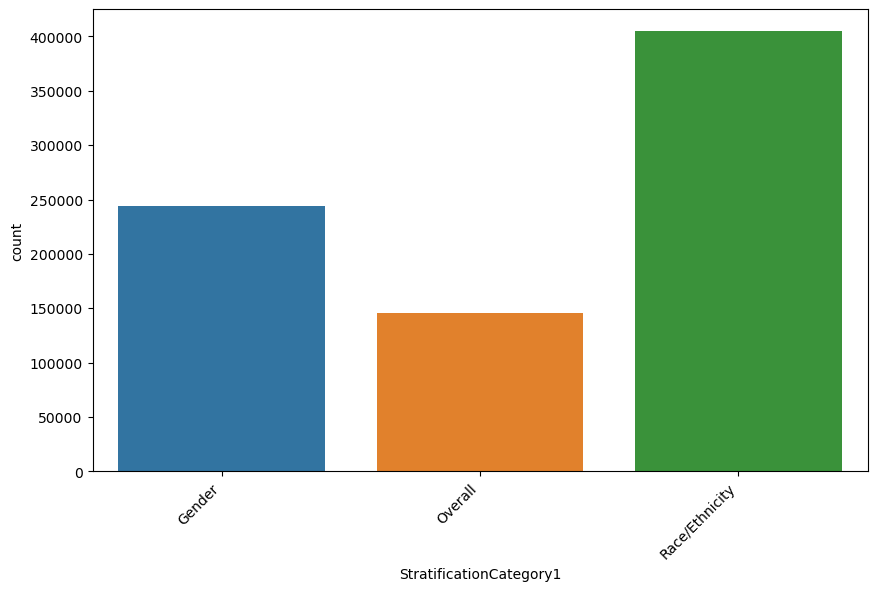

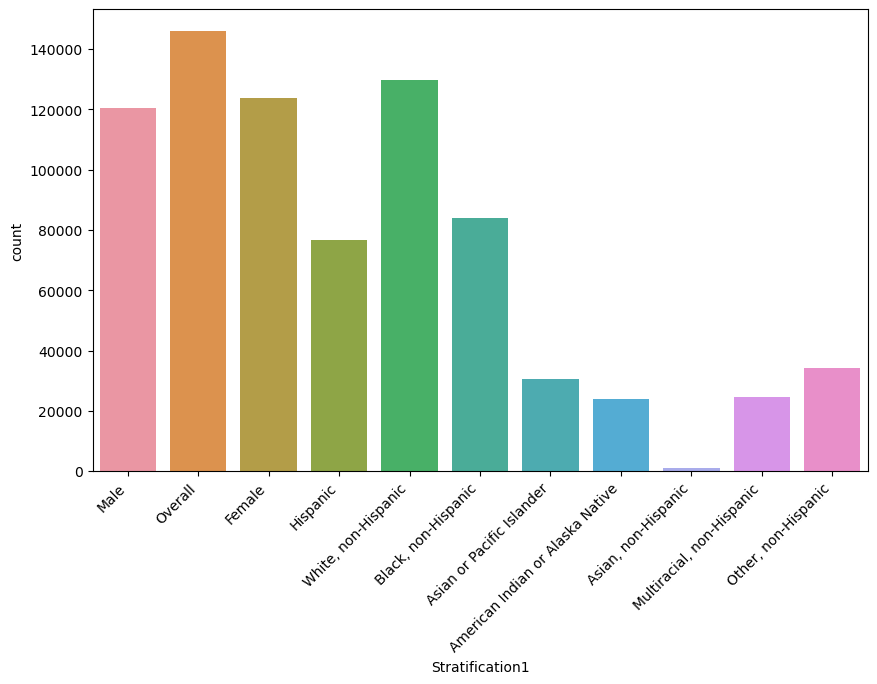

GeoLocation has too many unique values to display a bar chart.


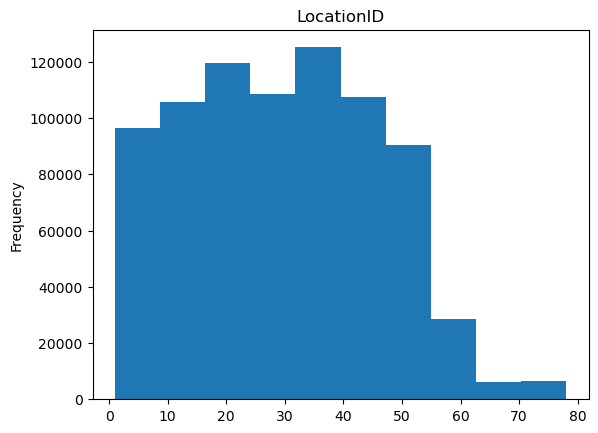

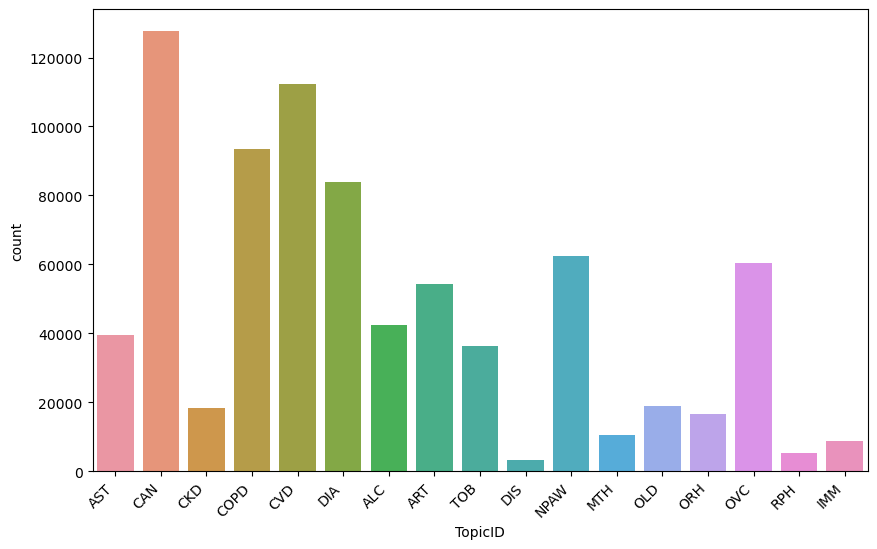

QuestionID has too many unique values to display a bar chart.


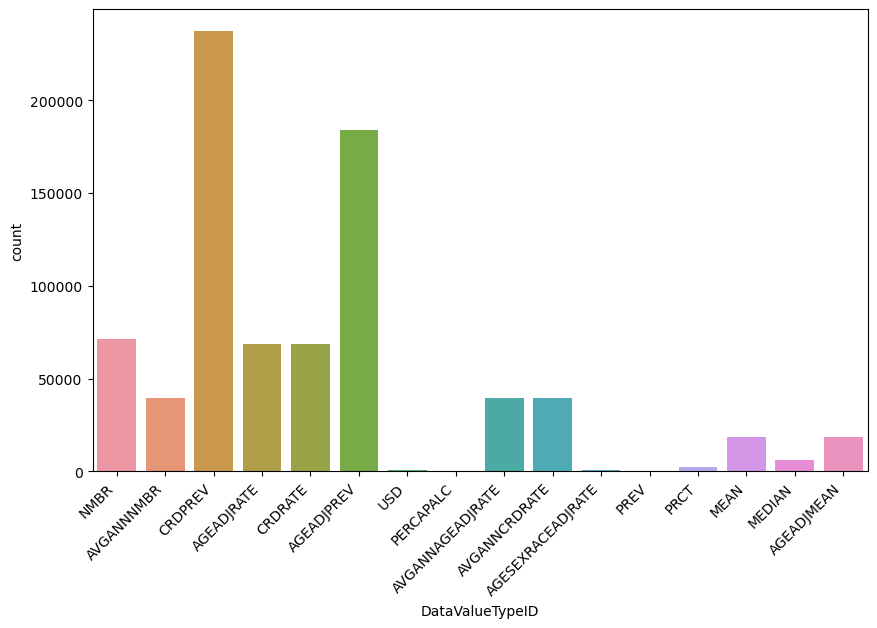

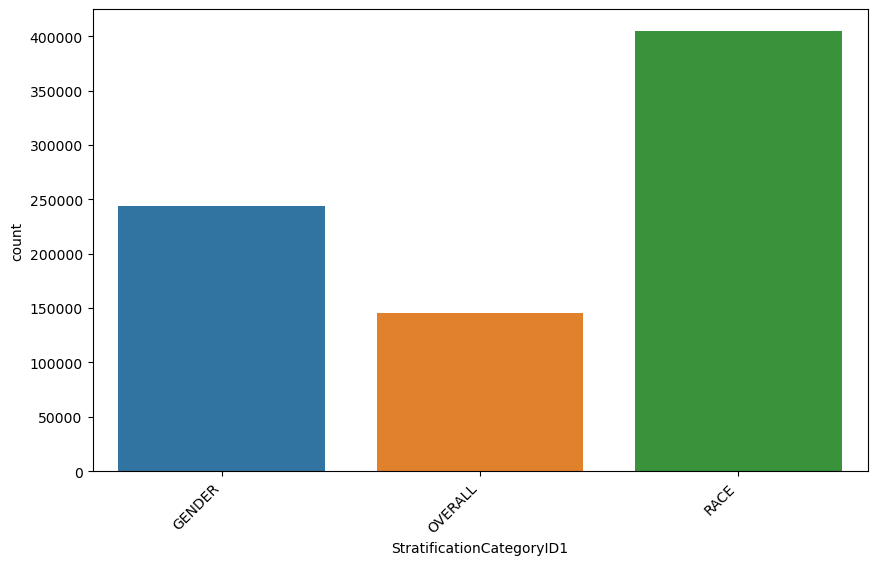

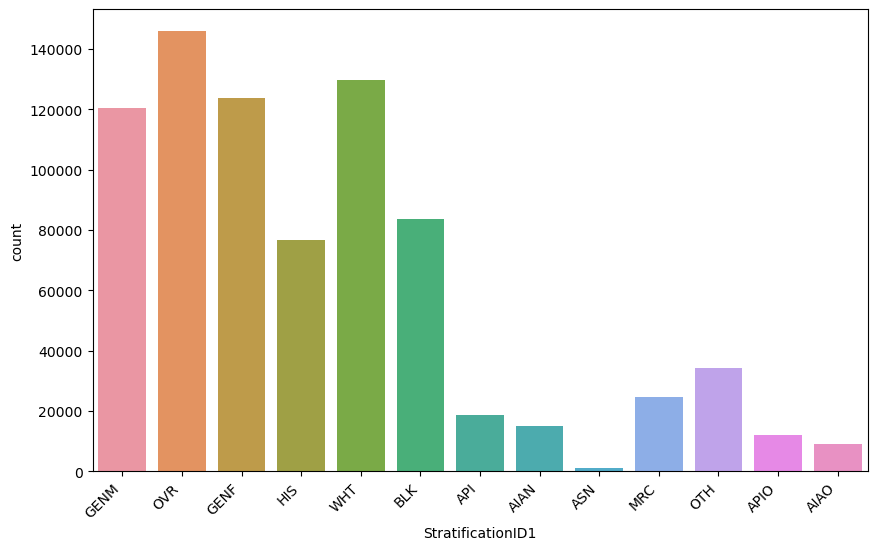

In [12]:
# For each column
for column in df.columns:
    # If the column is numeric
    if df[column].dtype != 'object':
        # Display a histogram
        plt.figure()
        df[column].plot(kind='hist', title=column)
        plt.savefig(f'../img/{column}_hist.png')  # Save the histogram
        plt.show()

        
    # If the column is categorical
    else:
        # Check if the number of unique values is too large
        if df[column].nunique() > 50:
            print(f'{column} has too many unique values to display a bar chart.')
        else:
            # Display a bar chart
            plt.figure(figsize=(10,6))
            chart = sns.countplot(data=df, x=column)
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
            plt.savefig(f'../img/{column}_bar.png')  # Save the bar chart
            plt.show()

# Task 1 - Temporal Analysis of Disease Indicators

In [13]:
# Filter out relevant columns
df_task1 = df[['YearStart', 'Topic', 'Question', 'DataValue']].copy()
df_task1 = df_task1[df_task1['YearStart'].between(2010, 2020)]

# Group by year and topic, calculate mean DataValue
df_task1_grouped = df_task1.groupby(['YearStart', 'Topic'], as_index=False)['DataValue'].mean()

# Display the first few rows of the grouped DataFrame
print(df_task1_grouped.head())

   YearStart                   Topic    DataValue
0       2010                 Alcohol   120.140595
1       2010                  Asthma  2286.501452
2       2010                  Cancer   714.156765
3       2010  Cardiovascular Disease  1538.521592
4       2010  Chronic Kidney Disease   759.668909


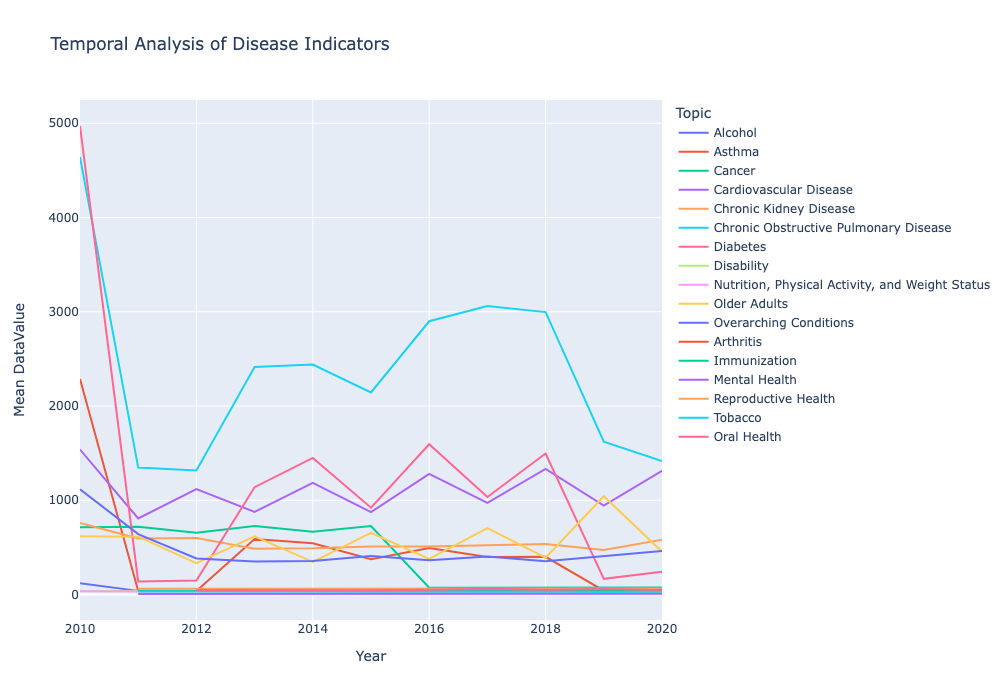

In [14]:
# Create interactive line plot
fig_task1 = px.line(df_task1_grouped, x='YearStart', y='DataValue', color='Topic',
                    title='Temporal Analysis of Disease Indicators',
                    labels={'YearStart': 'Year', 'DataValue': 'Mean DataValue'})
fig_task1.update_layout(height=700, width=1200)
py.write_image(fig_task1, '../img/fig_task1.png')
# Show plot
fig_task1.show()

# Task 2: Geographic Comparison of Disease Indicators

In [15]:
# Filter out relevant columns
df_task2 = df[['LocationAbbr', 'Topic', 'YearStart', 'YearEnd', 'DataValue']].copy()

# Create dropdown for topics
topics = df_task2['Topic'].unique().tolist()
topics.insert(0, 'All')
topic_dropdown = widgets.Dropdown(options=topics, description='Topic:')

# Create range slider for years
years = sorted(df_task2['YearStart'].unique().tolist() + df_task2['YearEnd'].unique().tolist())
year_range_slider = widgets.IntRangeSlider(value=[min(years), max(years)], min=min(years), max=max(years), description='Year Range:')

def update_plot(topic, year_range):
    df_filtered = df_task2.copy()
    
    if topic != 'All':
        df_filtered = df_filtered[df_filtered['Topic'] == topic]
    
    df_filtered = df_filtered[(df_filtered['YearStart'] >= year_range[0]) & (df_filtered['YearEnd'] <= year_range[1])]
    
    if topic == 'All':
        df_grouped = df_filtered.groupby(['LocationAbbr'])['DataValue'].agg(['min', 'max']).reset_index()
        hover_data = ['LocationAbbr']
    else:
        df_grouped = df_filtered.groupby(['LocationAbbr', 'Topic'])['DataValue'].agg(['min', 'max']).reset_index()
        hover_data = ['LocationAbbr', 'Topic']
    
    df_grouped['avg'] = df_grouped[['min', 'max']].mean(axis=1)
    
    fig_task2 = px.choropleth(df_grouped, locations='LocationAbbr', locationmode='USA-states',
                        color='avg', hover_name='LocationAbbr', 
                        title='Geographic Comparison of Disease Indicators',
                        labels={'avg': 'Average DataValue'},
                        scope='usa',  # Set map scope to USA
                        color_continuous_scale='sunsetdark',
                        )
    fig_task2.update_layout(height=768, width=1024)
    py.write_image(fig_task2, '../img/fig_task2.png')
    fig_task2.show()

widgets.interact(update_plot, topic=topic_dropdown, year_range=year_range_slider)


interactive(children=(Dropdown(description='Topic:', options=('All', 'Asthma', 'Cancer', 'Chronic Kidney Disea…

<function __main__.update_plot(topic, year_range)>

# Task 3: Demographic Analysis of Disease Indicators

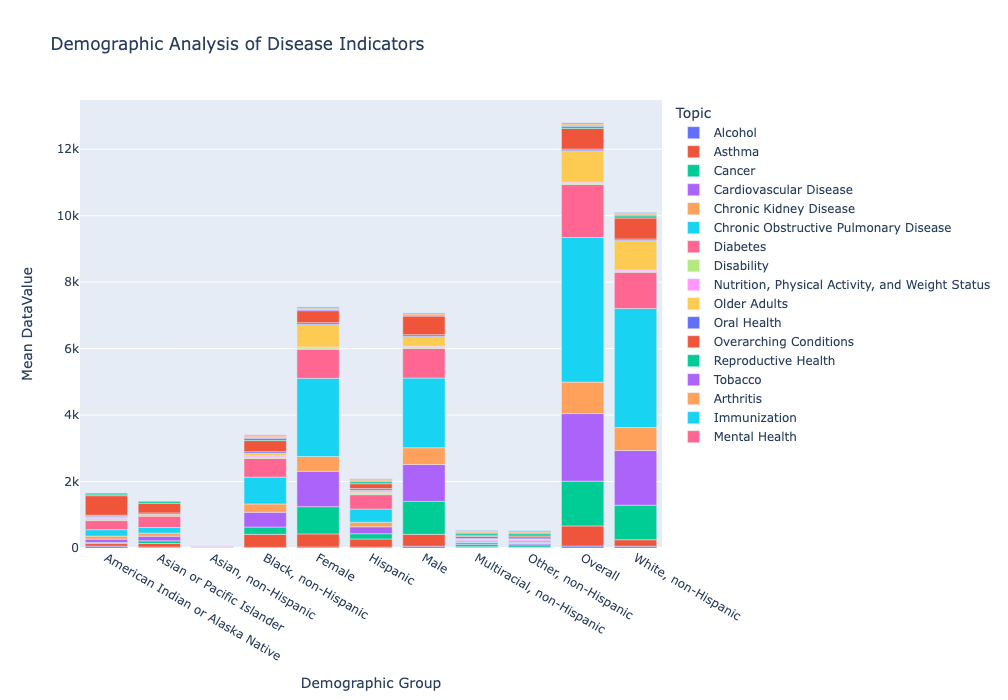

In [16]:
# Filter out relevant columns
df_task3 = df[['Stratification1', 'Topic', 'DataValue']].copy()

# Group by demographic variables and calculate mean DataValue
df_task3_grouped = df_task3.groupby(['Stratification1', 'Topic'], as_index=False)['DataValue'].mean()

# Create interactive bar plot
fig_task3 = px.bar(df_task3_grouped, x='Stratification1', y='DataValue', color='Topic',
                   title='Demographic Analysis of Disease Indicators',
                   labels={'Stratification1': 'Demographic Group', 'DataValue': 'Mean DataValue'})
fig_task3.update_layout(height=700, width=1150)
# Show plot
py.write_image(fig_task3, '../img/fig_task3.png')
fig_task3.show()

# Task 4

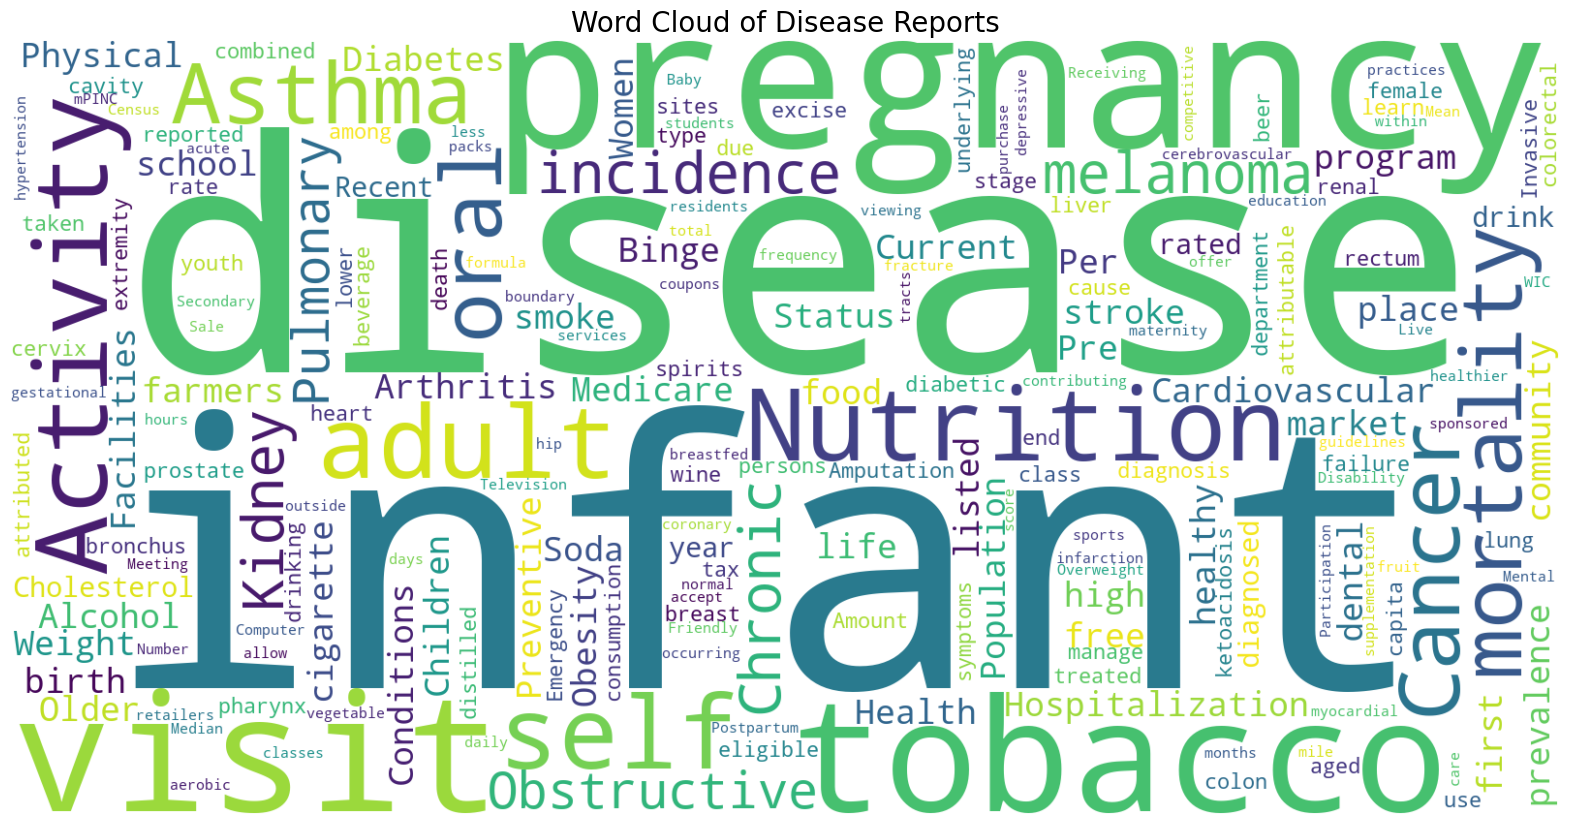

In [17]:
# Data preprocessing
df['TextData'] = df['Topic'] + ' ' + df['Question']

# Combine all text data into a single string
text_data = ' '.join(df['TextData'].astype(str))

# Count the frequency of each word
word_counts = Counter(text_data.split())

# Remove duplicate words
filtered_text_data = ' '.join(word for word in word_counts)

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(filtered_text_data)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disease Reports', fontsize=20)
plt.savefig(f'../img/fig_task4.png')
plt.show()


# Task 5

In [18]:
df_task5 = df[['DataValue', 'LocationAbbr', 'StratificationID1', 'TopicID', 'YearStart', 'DataValueType']].copy()
df_task5.dropna(inplace=True)
print(df_task5.info())


<class 'pandas.core.frame.DataFrame'>
Index: 794819 entries, 0 to 1185675
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DataValue          794819 non-null  float64
 1   LocationAbbr       794819 non-null  object 
 2   StratificationID1  794819 non-null  object 
 3   TopicID            794819 non-null  object 
 4   YearStart          794819 non-null  int64  
 5   DataValueType      794819 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 42.4+ MB
None


In [19]:
# Data preprocessing
X = df_task5[['DataValue', 'LocationAbbr', 'YearStart', 'StratificationID1', 'DataValueType']]
y = df_task5['TopicID']


In [20]:
# Encode the categorical columns
X = pd.get_dummies(X)

# Standardize 'DataValue'
scaler = StandardScaler()
X['DataValue'] = scaler.fit_transform(X[['DataValue']])

In [21]:
# Encode the 'TopicID' column
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=61)

In [22]:
# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [23]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.5032435016733349


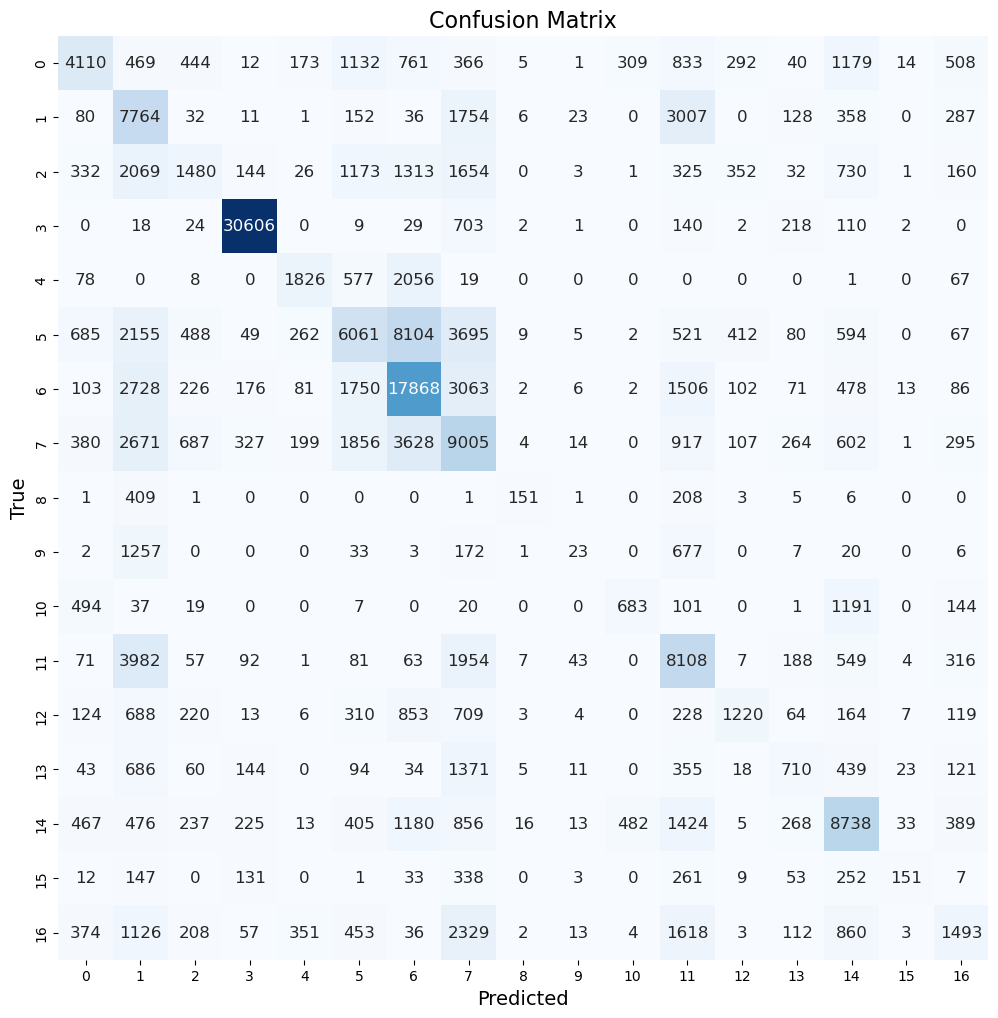

              precision    recall  f1-score   support

           0       0.56      0.39      0.46     10648
           1       0.29      0.57      0.39     13639
           2       0.35      0.15      0.21      9795
           3       0.96      0.96      0.96     31864
           4       0.62      0.39      0.48      4632
           5       0.43      0.26      0.33     23189
           6       0.50      0.63      0.56     28261
           7       0.32      0.43      0.37     20957
           8       0.71      0.19      0.30       786
           9       0.14      0.01      0.02      2201
          10       0.46      0.25      0.33      2697
          11       0.40      0.52      0.45     15523
          12       0.48      0.26      0.34      4732
          13       0.32      0.17      0.22      4114
          14       0.54      0.57      0.55     15227
          15       0.60      0.11      0.18      1398
          16       0.37      0.17      0.23      9042

    accuracy              

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.savefig(f'../img/fig_task5.png')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, zero_division=1))